In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
import calendar
from datetime import datetime
import math

In [2]:
weather = pd.read_csv("climate-daily.csv", low_memory = False)

In [3]:
weather.head()

,x,y,TOTAL_PRECIPITATION,SNOW_ON_GROUND,SPEED_MAX_GUST_FLAG,CLIMATE_IDENTIFIER,DIRECTION_MAX_GUST_FLAG,LOCAL_MONTH,TOTAL_SNOW,PROVINCE_CODE,...,MAX_TEMPERATURE_FLAG,STATION_NAME,MIN_TEMPERATURE,COOLING_DEGREE_DAYS,SPEED_MAX_GUST,TOTAL_SNOW_FLAG,SNOW_ON_GROUND_FLAG,TOTAL_PRECIPITATION_FLAG,HEATING_DEGREE_DAYS,MAX_REL_HUMIDITY
0,-79.4,43.666667,NaN,NaN,NaN,6158350,NaN,3,NaN,ON,...,NaN,TORONTO,0.0,0.0,NaN,NaN,NaN,NaN,13.8,NaN
1,-79.4,43.666667,NaN,NaN,NaN,6158350,NaN,3,NaN,ON,...,NaN,TORONTO,1.1,0.0,NaN,NaN,NaN,NaN,13.5,NaN
2,-79.4,43.666667,NaN,NaN,NaN,6158350,NaN,3,NaN,ON,...,NaN,TORONTO,2.2,0.0,NaN,NaN,NaN,NaN,11.3,NaN
3,-79.4,43.666667,NaN,NaN,NaN,6158350,NaN,3,NaN,ON,...,NaN,TORONTO,-3.9,0.0,NaN,NaN,NaN,NaN,12.4,NaN
4,-79.4,43.666667,NaN,NaN,NaN,6158350,NaN,3,NaN,ON,...,NaN,TORONTO,-1.1,0.0,NaN,NaN,NaN,NaN,15.2,NaN


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62116 entries, 0 to 62115
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   x                         62116 non-null  float64
 1   y                         62116 non-null  float64
 2   TOTAL_PRECIPITATION       60817 non-null  float64
 3   SNOW_ON_GROUND            19824 non-null  float64
 4   SPEED_MAX_GUST_FLAG       0 non-null      float64
 5   CLIMATE_IDENTIFIER        62116 non-null  int64  
 6   DIRECTION_MAX_GUST_FLAG   0 non-null      float64
 7   LOCAL_MONTH               62116 non-null  int64  
 8   TOTAL_SNOW                60867 non-null  float64
 9   PROVINCE_CODE             62116 non-null  object 
 10  MIN_TEMPERATURE_FLAG      9 non-null      object 
 11  HEATING_DEGREE_DAYS_FLAG  5 non-null      object 
 12  MIN_REL_HUMIDITY          1 non-null      float64
 13  LOCAL_DAY                 62116 non-null  int64  
 14  MEAN_T

In [5]:
def day_mean(day, month, column, rounded = True):
    ''' finds the mean value of a column on a specific day
        ex. average high temperature on March 7

        arguments:
            day: the numerical day to use, int
            month: the numerical month to use, int
            column: the column on the .csv to sort by (ex. 'MEAN_TEMPERATURE'), string
            rounded: an optional argument to round the averages to two decimal points
                set to true by default, boolean
        
        return:
            the numerical mean on that column and day
        '''

    df_oneday = weather.loc[(weather["LOCAL_MONTH"] == month) & (weather["LOCAL_DAY"] == day)]
    mean_value = df_oneday[column].mean()

    if rounded:
        return round(mean_value, 2)

In [6]:
mean_for_year = {}
months = list(calendar.month_name[1:])
for month in range(1, 13):
    for day in range(1, 32):
        temps_day = day_mean(day, month, "MEAN_TEMPERATURE")
        rain_day = day_mean(day, month, "TOTAL_PRECIPITATION")
        snow_day = day_mean(day, month, "SNOW_ON_GROUND")
        if not math.isnan(temps_day):
            mean_for_year[f"{calendar.month_name[month]} {day}"] = {"MEAN_TEMPERATURE": temps_day, "TOTAL_PRECIPITATION": rain_day, "SNOW_ON_GROUND": snow_day}
pandas_dict = pd.DataFrame(mean_for_year).T
pandas_dict

,MEAN_TEMPERATURE,TOTAL_PRECIPITATION,SNOW_ON_GROUND
January 1,-3.68,2.20,4.81
January 2,-3.69,2.57,5.08
January 3,-3.86,2.08,5.81
January 4,-4.00,1.71,5.71
January 5,-4.15,2.25,5.74
...,...,...,...
December 27,-3.44,2.31,4.59
December 28,-3.46,1.77,4.59
December 29,-3.50,2.20,4.61
December 30,-3.99,2.17,4.56


In [7]:
with pd.option_context('display.max_rows', None,):
    print(pandas_dict)

              MEAN_TEMPERATURE  TOTAL_PRECIPITATION  SNOW_ON_GROUND
January 1                -3.68                 2.20            4.81
January 2                -3.69                 2.57            5.08
January 3                -3.86                 2.08            5.81
January 4                -4.00                 1.71            5.71
January 5                -4.15                 2.25            5.74
January 6                -3.86                 2.12            5.52
January 7                -4.60                 2.09            6.19
January 8                -5.13                 2.32            6.59
January 9                -4.78                 1.96            6.48
January 10               -4.91                 2.20            6.60
January 11               -5.11                 2.36            6.48
January 12               -5.09                 2.05            7.02
January 13               -4.80                 2.09            7.22
January 14               -4.75                 2

In [8]:
sorted_dict = pandas_dict.sort_values(by = ['MEAN_TEMPERATURE', 'TOTAL_PRECIPITATION'], ascending = [False, False])
sorted_dict

,MEAN_TEMPERATURE,TOTAL_PRECIPITATION,SNOW_ON_GROUND
July 18,21.66,2.72,0.00
July 17,21.55,3.29,0.00
August 8,21.50,2.88,0.00
July 27,21.46,2.98,0.00
July 9,21.43,2.64,0.00
...,...,...,...
February 1,-5.86,2.19,8.22
February 4,-5.98,1.73,8.86
February 3,-6.06,2.28,8.62
February 2,-6.27,1.94,8.87


In [9]:
print(sorted_dict.iloc[0])

MEAN_TEMPERATURE       21.66
TOTAL_PRECIPITATION     2.72
SNOW_ON_GROUND          0.00
Name: July 18, dtype: float64


In [10]:
def weather_probability(day, month, column):
    ''' finds the probability that a certain weather condition will occur on a day (snow or rain)

    arguments:
        day: the numerical day to use, int
        month: the numerical month to use, int
        column: the column on the .csv to sort by (ex. 'TOTAL_RAIN'), string
    
    return:
        the percentage probability that the weather condition occurs on that day
    '''

    df_oneday = weather.loc[(weather["LOCAL_MONTH"] == month) & (weather["LOCAL_DAY"] == day)]
    total_days = 0
    times_weather_occured = 0
    for date in df_oneday[column]:
        if math.isnan(date):
            continue
        if date:
            times_weather_occured += 1
        total_days += 1
    if not total_days:
        total_days = 1
    return round((times_weather_occured / total_days) * 100, 2)

In [11]:
print(weather_probability(27, 12, "TOTAL_SNOW"))

36.69


In [12]:
# df_oneday = weather.loc[(weather["LOCAL_MONTH"] == 1) & (weather["LOCAL_DAY"] == 8)]
# with pd.option_context('display.max_rows', None,):
#     print(df_oneday['MEAN_TEMPERATURE'])

In [51]:
mean_for_year = {}
months = list(calendar.month_name[1:])
for month in range(1, 13):
    for day in range(1, 32):
        temps_day = day_mean(day, month, "MEAN_TEMPERATURE")
        rain_probability = weather_probability(day, month, "TOTAL_RAIN")
        snow_probability = weather_probability(day, month, "TOTAL_SNOW")
        snow_ground_day = day_mean(day, month, "SNOW_ON_GROUND")
        snow_ground_probability = weather_probability(day, month, "SNOW_ON_GROUND")
        if not math.isnan(temps_day):
            temp_class = (temps_day // 5) + 2
            rain_class = rain_probability // 15
            snow_class = snow_probability // 15
            snow_ground_class = snow_ground_day // 2.5
            mean_for_year[f"{calendar.month_name[month]} {day}"] = {"MEAN_TEMPERATURE": temps_day, "TOTAL_RAIN": rain_day, "TOTAL_SNOW": snow_day, "SNOW_ON_GROUND": snow_ground_day, "Snow on Ground Probability %": snow_ground_probability, "Temperature Rating": temp_class, "Rain Probability %": rain_probability, "Rain Rating": rain_class, "Snow Probability %": snow_probability, "Snow Rating": snow_class}
pandas_dict = pd.DataFrame(mean_for_year).T
#pandas_dict

In [50]:
dates_column = pandas_dict.index
dates_column

Index(['January 1', 'January 2', 'January 3', 'January 4', 'January 5',
       'January 6', 'January 7', 'January 8', 'January 9', 'January 10',
       ...
       'December 22', 'December 23', 'December 24', 'December 25',
       'December 26', 'December 27', 'December 28', 'December 29',
       'December 30', 'December 31'],
      dtype='object', length=366)

In [14]:
pandas_dict["Snow Probability %"]

January 1      29.41
January 2      38.82
January 3      39.41
January 4      35.29
January 5      37.06
               ...  
December 27    36.69
December 28    30.77
December 29    31.95
December 30    34.32
December 31    34.91
Name: Snow Probability %, Length: 366, dtype: float64

In [15]:
pd.set_option("display.max_rows", None)
pandas_dict

,MEAN_TEMPERATURE,TOTAL_RAIN,TOTAL_SNOW,SNOW_ON_GROUND,Snow on Ground Probability %,Temperature Rating,Rain Probability %:,Rain Rating,Snow Probability %,Snow Rating
January 1,-3.68,2.0,4.84,4.81,53.23,1.0,17.14,1.0,29.41,1.0
January 2,-3.69,2.0,4.84,5.08,53.23,1.0,16.57,1.0,38.82,2.0
January 3,-3.86,2.0,4.84,5.81,64.52,1.0,16.57,1.0,39.41,2.0
January 4,-4.00,2.0,4.84,5.71,62.90,1.0,13.14,0.0,35.29,2.0
January 5,-4.15,2.0,4.84,5.74,66.13,1.0,17.14,1.0,37.06,2.0
January 6,-3.86,2.0,4.84,5.52,67.74,1.0,14.86,0.0,45.29,3.0
January 7,-4.60,2.0,4.84,6.19,70.97,1.0,12.00,0.0,38.82,2.0
January 8,-5.13,2.0,4.84,6.59,74.60,0.0,16.48,1.0,42.11,2.0
January 9,-4.78,2.0,4.84,6.48,69.84,1.0,17.05,1.0,44.44,2.0
January 10,-4.91,2.0,4.84,6.60,72.58,1.0,15.43,1.0,34.12,2.0


In [16]:
weather["SNOW_ON_GROUND"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
36        NaN
37        NaN
38        NaN
39        NaN
40        NaN
41        NaN
42        NaN
43        NaN
44        NaN
45        NaN
46        NaN
47        NaN
48        NaN
49        NaN
50        NaN
51        NaN
52        NaN
53        NaN
54        NaN
55        NaN
56        NaN
57        NaN
58        NaN
59        NaN
60        NaN
61        NaN
62        NaN
63        NaN
64        NaN
65        NaN
66        NaN
67        NaN
68        NaN
69        NaN
70        NaN
71    

In [17]:
months = list(calendar.month_name[1:])
a_dict = {}
num_days = 0
class_total = 0
flag = True
for month in range(1, 13):
    for day in range(1, 32):
        class_oneday = weather.loc[(weather["LOCAL_MONTH"] == month) & (weather["LOCAL_DAY"] == day)]
        for temperature in class_oneday["MEAN_TEMPERATURE"]:
            if not math.isnan(temperature):
                flag = False
                class_total += (temperature//5) + 5
                num_days += 1
        if flag:
            num_days = 1
        a_dict[f"{calendar.month_name[month]} {day}"] = (class_total // num_days) - 2
        class_total = 0
        num_days = 0
        flag = True

for key, value in a_dict.items():
    print(f"{key} : {value}")

January 1 : 1.0
January 2 : 1.0
January 3 : 1.0
January 4 : 1.0
January 5 : 1.0
January 6 : 1.0
January 7 : 1.0
January 8 : 1.0
January 9 : 1.0
January 10 : 1.0
January 11 : 1.0
January 12 : 1.0
January 13 : 1.0
January 14 : 1.0
January 15 : 1.0
January 16 : 1.0
January 17 : 1.0
January 18 : 1.0
January 19 : 1.0
January 20 : 1.0
January 21 : 1.0
January 22 : 1.0
January 23 : 1.0
January 24 : 1.0
January 25 : 1.0
January 26 : 1.0
January 27 : 1.0
January 28 : 1.0
January 29 : 1.0
January 30 : 1.0
January 31 : 1.0
February 1 : 1.0
February 2 : 1.0
February 3 : 1.0
February 4 : 1.0
February 5 : 1.0
February 6 : 1.0
February 7 : 1.0
February 8 : 1.0
February 9 : 1.0
February 10 : 1.0
February 11 : 1.0
February 12 : 1.0
February 13 : 1.0
February 14 : 1.0
February 15 : 1.0
February 16 : 1.0
February 17 : 1.0
February 18 : 1.0
February 19 : 1.0
February 20 : 1.0
February 21 : 1.0
February 22 : 1.0
February 23 : 1.0
February 24 : 1.0
February 25 : 1.0
February 26 : 1.0
February 27 : 1.0
Febru

In [18]:
months = list(calendar.month_name[1:])
a_dict = {}
num_days = 0
class_total = 0
flag = True
for month in range(1, 13):
    for day in range(1, 32):
        class_oneday = weather.loc[(weather["LOCAL_MONTH"] == month) & (weather["LOCAL_DAY"] == day)]
        for temperature in class_oneday["MEAN_TEMPERATURE"]:
            if not math.isnan(temperature):
                flag = False
                class_total += ((temperature+273)//5)
                num_days += 1
        if flag:
            num_days = 1
        a_dict[f"{calendar.month_name[month]} {day}"] = (class_total // num_days) - 52
        class_total = 0
        num_days = 0
        flag = True

for key, value in a_dict.items():
    print(f"{key} : {value}")

January 1 : 1.0
January 2 : 1.0
January 3 : 1.0
January 4 : 1.0
January 5 : 1.0
January 6 : 1.0
January 7 : 1.0
January 8 : 1.0
January 9 : 1.0
January 10 : 1.0
January 11 : 1.0
January 12 : 1.0
January 13 : 1.0
January 14 : 1.0
January 15 : 1.0
January 16 : 1.0
January 17 : 1.0
January 18 : 1.0
January 19 : 1.0
January 20 : 1.0
January 21 : 1.0
January 22 : 1.0
January 23 : 1.0
January 24 : 1.0
January 25 : 1.0
January 26 : 0.0
January 27 : 0.0
January 28 : 1.0
January 29 : 1.0
January 30 : 1.0
January 31 : 1.0
February 1 : 0.0
February 2 : 0.0
February 3 : 0.0
February 4 : 0.0
February 5 : 0.0
February 6 : 1.0
February 7 : 1.0
February 8 : 0.0
February 9 : 1.0
February 10 : 0.0
February 11 : 0.0
February 12 : 1.0
February 13 : 1.0
February 14 : 1.0
February 15 : 1.0
February 16 : 1.0
February 17 : 1.0
February 18 : 1.0
February 19 : 1.0
February 20 : 1.0
February 21 : 1.0
February 22 : 1.0
February 23 : 1.0
February 24 : 1.0
February 25 : 1.0
February 26 : 1.0
February 27 : 1.0
Febru

In [19]:
def month_mean(month, column, rounded = True, probability = False):
    ''' find the value of a column for a daily average of a full month
    ex. average amount of daily snow in December

    arguments:
        month: the numerical month, int
        column: the column on the .csv to sort by (ex. 'SNOW_ON_GROUND), string
        rounded: an optional argument to round the averages to two decimal points
                set to true by default, boolean

    return:
        the daily average of the column value for that month
    '''

    df_onemonth = weather.loc[(weather["LOCAL_MONTH"] == month)]
    if probability:
        total_days = 0
        times_weather_occured = 0
        for datapoint in df_onemonth[column]:
            if math.isnan(datapoint):
                continue
            elif datapoint:
                times_weather_occured += 1
            total_days += 1
        if not total_days:
            total_days = 1
        mean_value = (times_weather_occured / total_days) * 100
    else:
        mean_value = df_onemonth[column].mean()

    if round:
        return round(mean_value, 2)
    else:
        return mean_value

In [20]:
print(month_mean(1, "SNOW_ON_GROUND", probability = True))

67.73


In [21]:
df_onemonth = weather.loc[(weather["LOCAL_MONTH"] == 12)]
df_onemonth["SNOW_ON_GROUND"]

275       NaN
276       NaN
277       NaN
278       NaN
279       NaN
280       NaN
281       NaN
282       NaN
283       NaN
284       NaN
285       NaN
286       NaN
287       NaN
288       NaN
289       NaN
290       NaN
291       NaN
292       NaN
293       NaN
294       NaN
295       NaN
296       NaN
297       NaN
298       NaN
299       NaN
300       NaN
301       NaN
302       NaN
303       NaN
304       NaN
305       NaN
640       NaN
641       NaN
642       NaN
643       NaN
644       NaN
645       NaN
646       NaN
647       NaN
648       NaN
649       NaN
650       NaN
651       NaN
652       NaN
653       NaN
654       NaN
655       NaN
656       NaN
657       NaN
658       NaN
659       NaN
660       NaN
661       NaN
662       NaN
663       NaN
664       NaN
665       NaN
666       NaN
667       NaN
668       NaN
669       NaN
670       NaN
1005      NaN
1006      NaN
1007      NaN
1008      NaN
1009      NaN
1010      NaN
1011      NaN
1012      NaN
1013      NaN
1014  

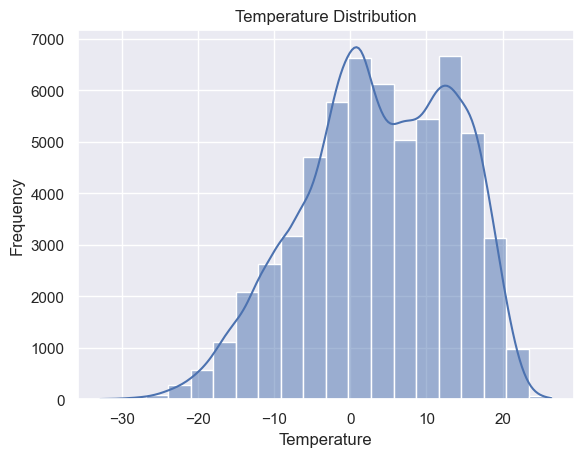

In [44]:
sns.histplot(weather['MIN_TEMPERATURE'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


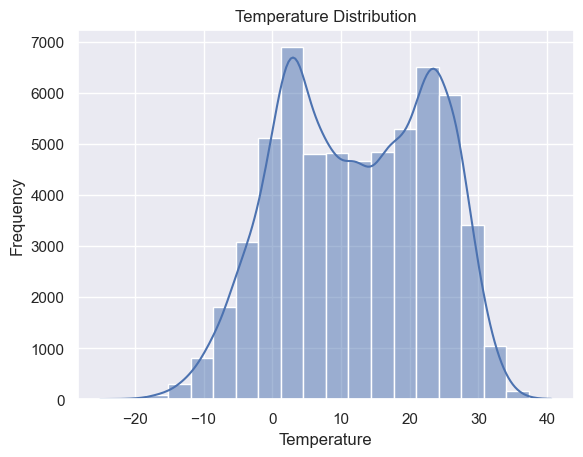

In [45]:
sns.histplot(weather['MAX_TEMPERATURE'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


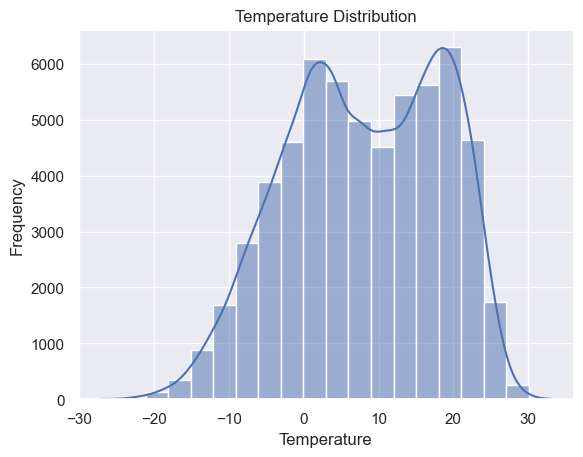

In [46]:
sns.histplot(weather['MEAN_TEMPERATURE'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


In [60]:
import pandas as pd
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt

# Assuming 'pandas_dict' is your DataFrame with dates as the index
# If the dates are in a separate column, use pandas_dict['date'] instead
df = pandas_dict

# Check for invalid or out-of-bounds dates
print(df.index)

# Handle NaN or NaT values if present
df = df.dropna(subset=[df.index.name])

# Convert the index to a datetime object with a specific format if needed
# df.index = pd.to_datetime(df.index, format='%Y-%m-%d')  # Adjust the format accordingly

# Group the data by month and day and calculate the mean probability of snow
df_monthly = df.groupby([df.index.month, df.index.day])['Snow Probability %'].mean().reset_index()

# Create a Streamlit slider to select the month
month = st.slider('Select a month', 1, 12)

# Filter the data to only include the selected month
df_monthly_filtered = df_monthly[df_monthly['date'] == month]

# Create a line plot of the probability of snow for each day in the selected month
sns.lineplot(data=df_monthly_filtered, x='date', y='Snow Probability %')

# Set the x-axis label
plt.xlabel('Day of the month')

# Set the y-axis label
plt.ylabel('Probability of snow')

# Set the plot title
plt.title(f'Probability of snow for each day in month {month}')

# Display the plot
st.pyplot()  # Use st.pyplot() instead of plt.show() for Streamlit


Index(['January 1', 'January 2', 'January 3', 'January 4', 'January 5',
       'January 6', 'January 7', 'January 8', 'January 9', 'January 10',
       ...
       'December 22', 'December 23', 'December 24', 'December 25',
       'December 26', 'December 27', 'December 28', 'December 29',
       'December 30', 'December 31'],
      dtype='object', length=366)


AttributeError: 'Index' object has no attribute 'month'

In [61]:
import pandas as pd
import seaborn as sns
import streamlit as st
import calendar

# Create a function to calculate the probability of rain for each day in a month
def probability_of_rain(month):
    # Filter the data to only include the selected month
    df_monthly_filtered = means_for_year_pandas[means_for_year_pandas.index.str.startswith(month)]

    # Create a line plot of the probability of rain for each day in the selected month
    sns.lineplot(data=df_monthly_filtered, x=df_monthly_filtered.index.str.split().str[1], y='Rain Probability %')

    # Set the x-axis label
    plt.xlabel('Day of the month')

    # Set the y-axis label
    plt.ylabel('Probability of rain')

    # Set the plot title
    plt.title(f'Probability of rain for each day in {month}')

    # Display the plot
    plt.show()

# Create a Streamlit selectbox to select the month
month = st.selectbox('Select a month', list(calendar.month_name)[1:])

# Call the probability_of_rain function with the selected month
probability_of_rain(month)


2023-12-31 16:50:18.350 
  command:

    streamlit run C:\Users\regig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


NameError: name 'means_for_year_pandas' is not defined